# DANTE.py Figure Maker

All of the plots that require more than one data file will be made in this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.lines as mlines
import seaborn as sns
import pandas as pd

## Neutron Stars

### Stiffnes Test

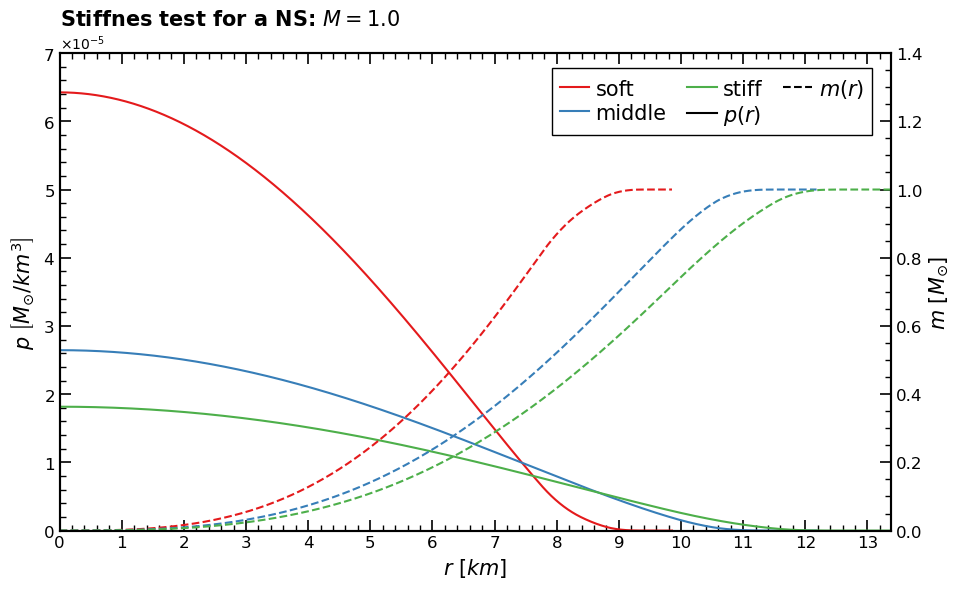

In [12]:
data = {}

s_type = 1
d_type = 0
EsOS = ['soft', 'middle', 'stiff']
p1_c = 'M'
p1_v = 1.0

for eos_c in EsOS:
    df = pd.read_csv(f"data\{s_type}_{d_type}_{eos_c}_{p1_c}_{p1_v}.csv")
    data[f'{eos_c}'] = df

# Configure the plot
fig, ax1 = plt.subplots(figsize=(9.71, 6))
colors = sns.color_palette("Set1", 10)
eos_colors = {"soft": 0, "middle": 1, "stiff": 2}

# Plot the pressure
for eos_c in EsOS:
    c = eos_colors[eos_c]
    ax1.plot(data[f'{eos_c}']['r'], data[f'{eos_c}']['p_A'], label=rf'$p_{{{eos_c}}}(r)$', color = colors[c], linewidth=1.5, linestyle='-')
ax1.set_xlabel(r'$r$ $\left[km\right]$', fontsize=15, loc='center')
ax1.set_ylabel(r'$p$ $\left[ M_{\odot} / km^3 \right]$', fontsize=15, loc='center', color='k')
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(-3, 3))

# Plot the mass
ax2 = ax1.twinx()
for eos_c in EsOS:
    c = eos_colors[eos_c]
    ax2.plot(data[f'{eos_c}']['r'], data[f'{eos_c}']['m'], label=rf'$m_{{{eos_c}}}(r)$', color = colors[c], linewidth=1.5, linestyle='--')
ax2.set_ylabel(r'$m$ $\left[ M_{\odot} \right]$', fontsize=15, loc='center', color='k')

# Set limits
if True == True:
    ax1.set_xlim(0, 13.38)
    ax1.set_ylim(0, 7e-5)
    ax2.set_ylim(0, 1.4)

# Configure ticks
ax1.tick_params(axis='both', which='major', direction='in', length=8, width=1.2, labelsize=12, top=True)
ax1.tick_params(axis='both', which='minor', direction='in', length=4, width=1, labelsize=12, top=True)
ax1.minorticks_on()
ax2.tick_params(axis='both', which='major', direction='in', length=8, width=1.2, labelsize=12, top=True, right=True)
ax2.tick_params(axis='both', which='minor', direction='in', length=4, width=1, labelsize=12, top=True, right=True)
ax2.minorticks_on()

# Configure ticks spacing
if True == True:
    ax1.set_xticks(np.arange(0, 13.38, 1))
    #ax1.set_xticks(np.arange(0, 9.6, 0.2), minor=True)
    ax1.set_yticks(np.arange(0, 7.1e-5, 1e-5))
    #ax1.set_yticks(np.arange(0, 1.31e-4, 0.025e-4), minor=True)
    ax2.set_yticks(np.arange(0, 1.41, 0.2))
    #ax2.set_yticks(np.arange(0, 1.01, 0.02), minor=True)

# Set thicker axes
for ax in [ax1, ax2]:
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_color('k')
    ax.spines['right'].set_color('k')
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')
    
# Add a legend
Handles_list = [mlines.Line2D([], [], color=colors[0], linestyle='-', label=r"soft"),
mlines.Line2D([], [], color=colors[1], linestyle='-', label=r"middle"),
mlines.Line2D([], [], color=colors[2], linestyle='-', label=r"stiff"),
mlines.Line2D([], [], color='k', linestyle='-', label=r"$p(r)$"),
mlines.Line2D([], [], color='k', linestyle='--', label=r"$m(r)$")]
ax1.legend(handles=Handles_list, loc = "upper right", bbox_to_anchor=(0.99, 0.99), fontsize=15, frameon=True, fancybox=False, ncol = 3, edgecolor="black", framealpha=1, labelspacing=0.2, handletextpad=0.3, handlelength=1.4, columnspacing=1)


# Save Fig as pdf
plt.title(rf'Stiffnes test for a NS: $M={p1_v}$', loc='left', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig(f"figures\stiffness_test_NS_{p1_c}_{p1_v}.pdf", format="pdf", bbox_inches="tight")

plt.show()

This graph shows how the stiffness of a star's Equation of State affects its structure. As we can see, all the stars have the same amount of matter, but their radii (the distance from the centre to the surface) differ greatly. If the EoS is soft, the radius is smallest. This is because a soft EoS allows matter to be more compact, reducing the radius and increasing the pressure at the centre. On the other hand, a stiff EoS spreads its matter over a larger radius and has a lower overall pressure. 

This means that the stiffness of an EoS tells us the strength at which the matter can be compressed. The harder a star is, the harder it is to compact.

### Mass-Radius Curves

## Dark Matter Stars